In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from googleapiclient.discovery import build

In [2]:
api_key = '[ENter your API key here]'
channel_ids =  ['UCKIebaFbubF2L_ol3ujxoSA',
                'UCEk1jBxAl6fe-_G37G7huQA',
                'UCRI00CwLZdLRCWg5BdDOsNw',
                'UCtRa82x1BwQdnpHf0Es4gcQ',
                'UCa90xqK2odw1KV5wHU9WRhg',
                'UC2D2CMWXMOVWx7giW1n3LIg',
                'UCQ4FNww3XoNgqIlkBqEAVCg',
                'UCeP5_FL11TnvXuvrFvALJyA',
                'UCt1fxPc6KaOeMxdhtUcEEEA',
                'UCJihyK0A38SZ6SdJirEdIOw'
               ]

youtube = build('youtube', 'v3', developerKey = api_key)

## Function to scrap channel statistics

In [3]:
def get_channel_stats (youtube, channel_ids):
    channels_data = []
    request = youtube.channels().list(
                part = 'snippet,contentDetails,statistics',
                id = ','.join(channel_ids))
    
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscriber_count = response['items'][i]['statistics']['subscriberCount'],
                    Total_views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])           
               
        channels_data.append(data)           
                      
    return channels_data

In [4]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [5]:
channel_data = pd.DataFrame(channel_stats)
channel_data

,Channel_name,Subscriber_count,Total_views,Total_videos,playlist_id
0,Gate Smashers,1640000,366544435,1443,UUJihyK0A38SZ6SdJirEdIOw
1,Bhajan Marg,4880000,1020078914,2618,UUEk1jBxAl6fe-_G37G7huQA
2,Hell's Kitchen,1870000,1365579892,1241,UUt1fxPc6KaOeMxdhtUcEEEA
3,Saurav Sinha,928000,55848085,228,UUKIebaFbubF2L_ol3ujxoSA
4,The Canadian Lad,1750000,429579312,258,UURI00CwLZdLRCWg5BdDOsNw
5,Iman Gadzhi,3730000,129931440,449,UUQ4FNww3XoNgqIlkBqEAVCg
6,The Office,3240000,2844964001,1236,UUa90xqK2odw1KV5wHU9WRhg
7,Gaurav Kapoor,1280000,282640693,127,UUeP5_FL11TnvXuvrFvALJyA
8,Andrew Huberman,4290000,194874286,179,UU2D2CMWXMOVWx7giW1n3LIg
9,Brooklyn Nine-Nine,870000,1040624981,1898,UUtRa82x1BwQdnpHf0Es4gcQ


In [6]:
channel_data['Subscriber_count'] = pd.to_numeric(channel_data['Subscriber_count'])
channel_data['Total_views'] = pd.to_numeric(channel_data['Total_views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])

In [7]:
channel_data.dtypes

Channel_name        object
Subscriber_count     int64
Total_views          int64
Total_videos         int64
playlist_id         object
dtype: object

C:\Users\acer\anaconda3\envs\YT-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\anaconda3\envs\YT-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Temp\ipykernel_9788\466190320.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


[Text(0, 0.0, '0M'),
 Text(0, 1000000.0, '1M'),
 Text(0, 2000000.0, '2M'),
 Text(0, 3000000.0, '3M'),
 Text(0, 4000000.0, '4M'),
 Text(0, 5000000.0, '5M'),
 Text(0, 6000000.0, '6M')]

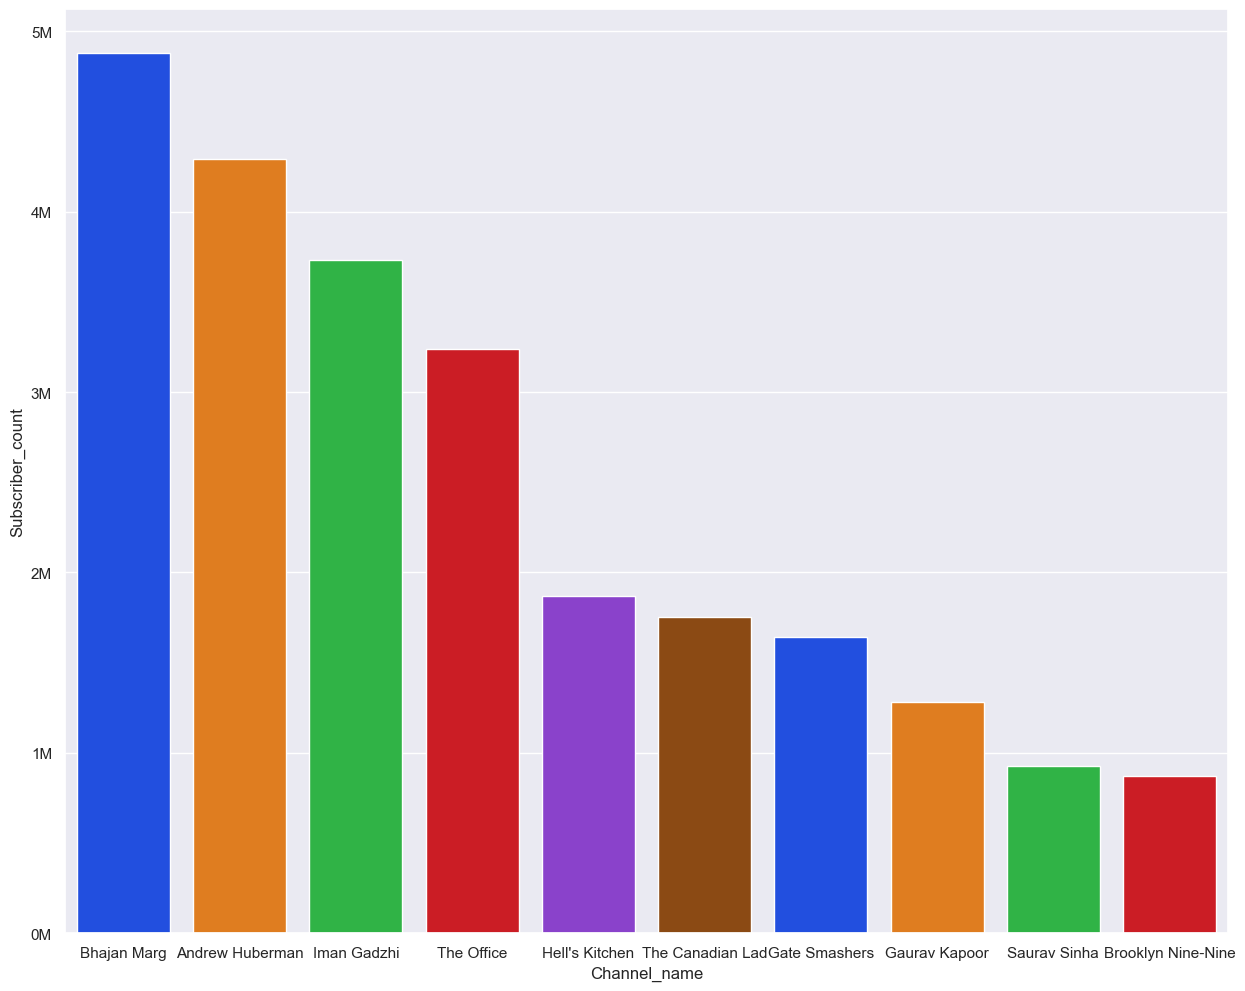

In [8]:
sns.set(rc={'figure.figsize':(15,12)})
palette = sns.color_palette("bright", 6)
ax = sns.barplot(x='Channel_name', y='Subscriber_count', data=channel_data,
                order=channel_data.sort_values('Subscriber_count',ascending = False).Channel_name,
                palette = palette)
ylabels = ['{:,.0f}'.format(y) + 'M' for y in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)

C:\Users\acer\anaconda3\envs\YT-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\anaconda3\envs\YT-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Temp\ipykernel_9788\1643075010.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)


[Text(0, 0.0, '0M'),
 Text(0, 500000000.0, '500M'),
 Text(0, 1000000000.0, '1,000M'),
 Text(0, 1500000000.0, '1,500M'),
 Text(0, 2000000000.0, '2,000M'),
 Text(0, 2500000000.0, '2,500M'),
 Text(0, 3000000000.0, '3,000M')]

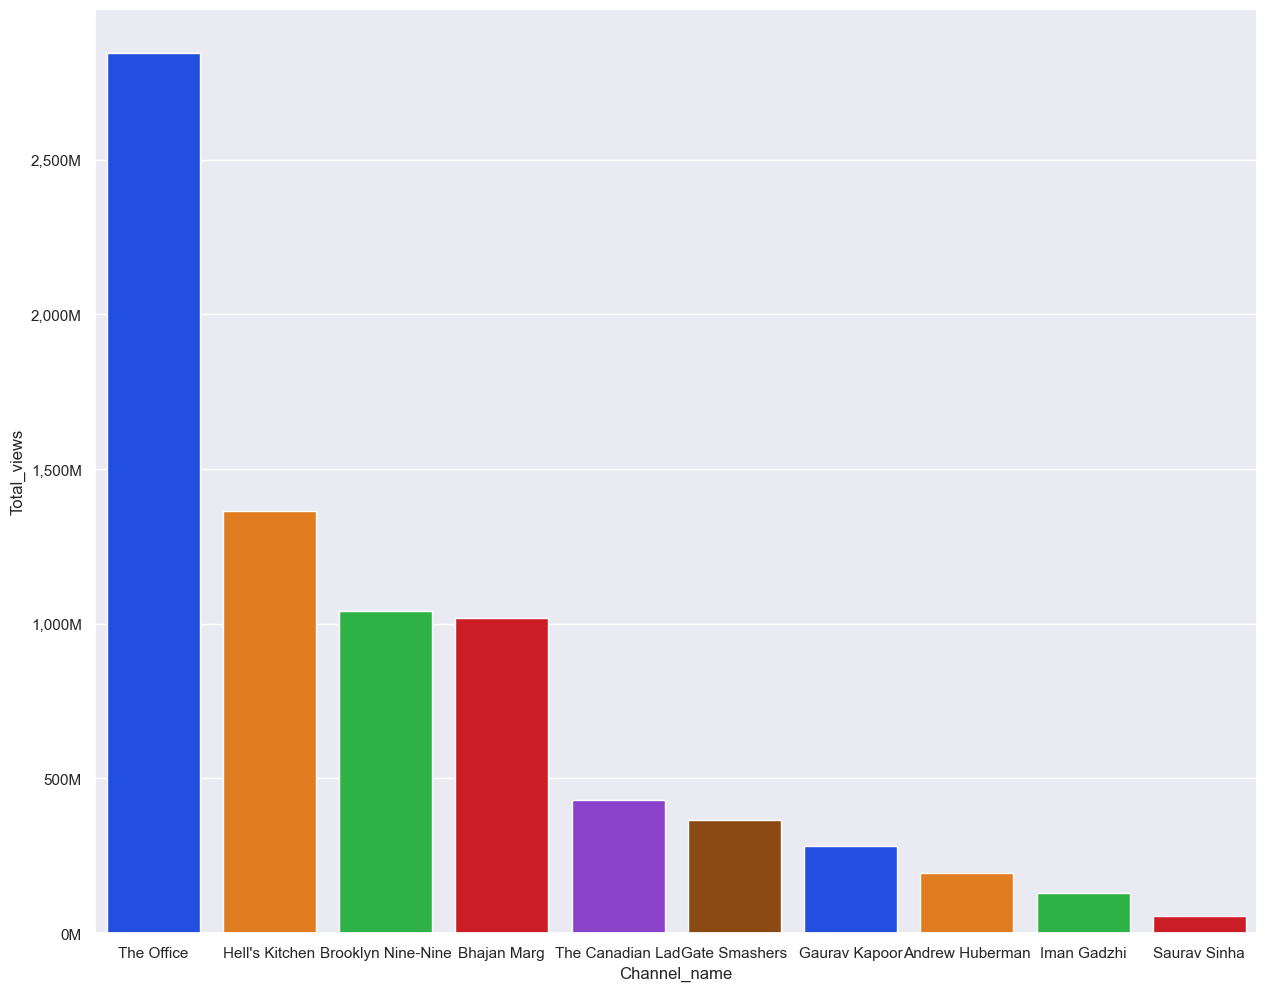

In [9]:
ax1 = sns.barplot(x='Channel_name', y='Total_views', data=channel_data,
                order=channel_data.sort_values('Total_views',ascending = False).Channel_name,
                 palette = palette)
ylabels = ['{:,.0f}'.format(y) + 'M' for y in ax1.get_yticks()/1000000]
ax1.set_yticklabels(ylabels)

C:\Users\acer\anaconda3\envs\YT-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\anaconda3\envs\YT-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


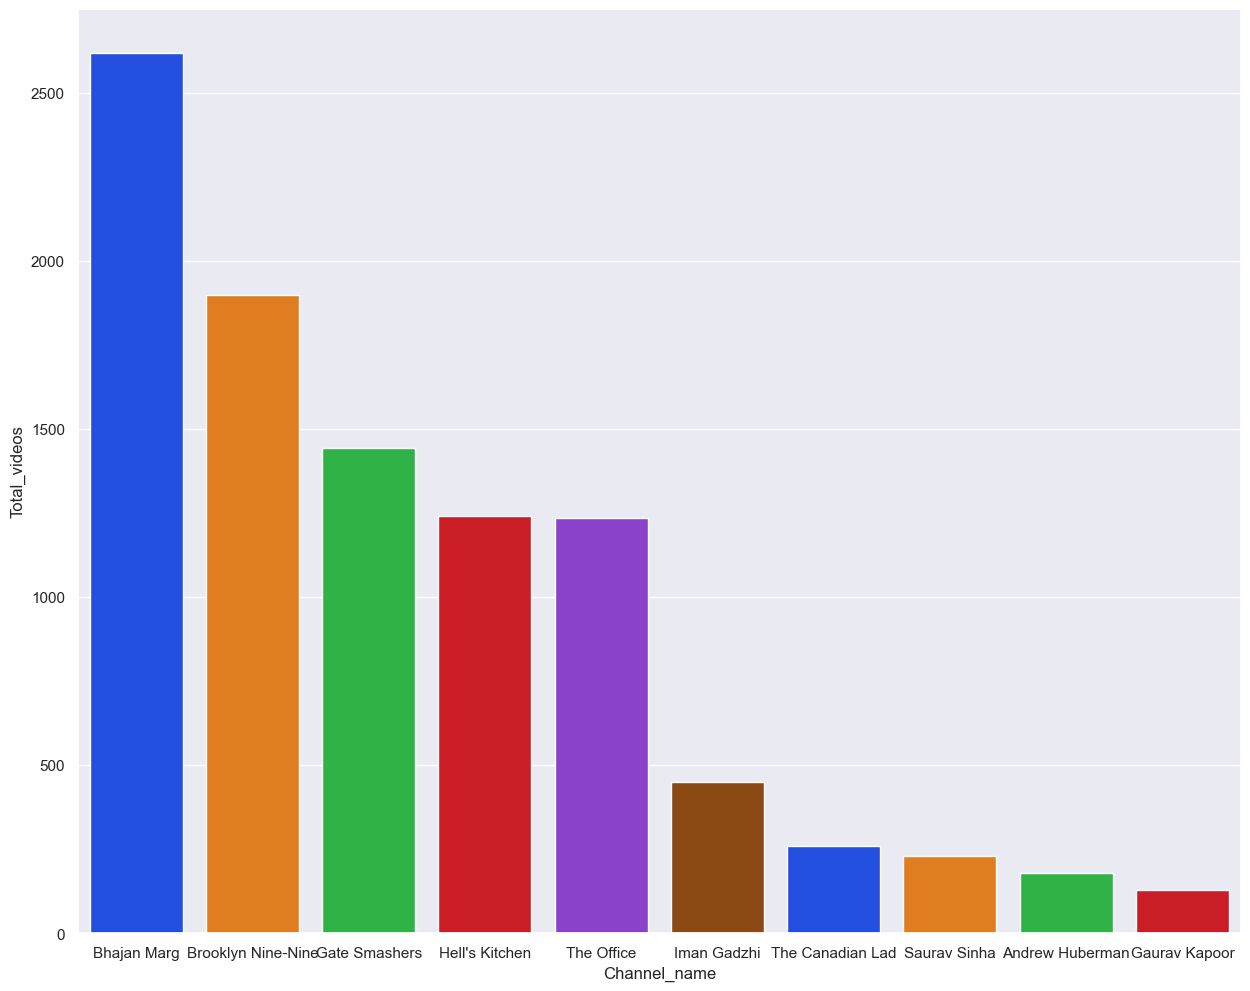

In [10]:
ax2 = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data,
                order=channel_data.sort_values('Total_videos',ascending = False).Channel_name,
                 palette = palette)

## Function to get the video ids

In [11]:
channel_data

,Channel_name,Subscriber_count,Total_views,Total_videos,playlist_id
0,Gate Smashers,1640000,366544435,1443,UUJihyK0A38SZ6SdJirEdIOw
1,Bhajan Marg,4880000,1020078914,2618,UUEk1jBxAl6fe-_G37G7huQA
2,Hell's Kitchen,1870000,1365579892,1241,UUt1fxPc6KaOeMxdhtUcEEEA
3,Saurav Sinha,928000,55848085,228,UUKIebaFbubF2L_ol3ujxoSA
4,The Canadian Lad,1750000,429579312,258,UURI00CwLZdLRCWg5BdDOsNw
5,Iman Gadzhi,3730000,129931440,449,UUQ4FNww3XoNgqIlkBqEAVCg
6,The Office,3240000,2844964001,1236,UUa90xqK2odw1KV5wHU9WRhg
7,Gaurav Kapoor,1280000,282640693,127,UUeP5_FL11TnvXuvrFvALJyA
8,Andrew Huberman,4290000,194874286,179,UU2D2CMWXMOVWx7giW1n3LIg
9,Brooklyn Nine-Nine,870000,1040624981,1898,UUtRa82x1BwQdnpHf0Es4gcQ


In [12]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Andrew Huberman', 'playlist_id'].iloc[0]

In [13]:
playlist_id

'UU2D2CMWXMOVWx7giW1n3LIg'

In [22]:
def get_video_ids( youtube, playlist_id ):
    request = youtube.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50
                )
    
    response = request.execute()
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token
                )
            
            response = request.execute()
            
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
    
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [23]:
video_ids = get_video_ids(youtube, playlist_id)

In [24]:
video_ids

['EhlIkzJwPlk',
 'pkJi9Raxikg',
 'qJ3uV7coZbA',
 'CJIXbibQ0jI',
 '1Wo6SqLNmLk',
 'FeRgqJVALMQ',
 'cwakOgHIT0E',
 'q8CHXefn7B4',
 '7Ey_vTTgJGc',
 'yOJvm_ri_hk',
 'qNzl12g0Dd8',
 'eMqWH3LYiII',
 'gveDhZW-rUk',
 'qPKd99Pa2iU',
 'z8c6EyMNd0A',
 'tLRCS48Ens4',
 'yixIc1Ai6jM',
 'eJU6Df_ffAE',
 'CrtR12PBKb0',
 '29n0WG317tM',
 'F54qXuTpgfM',
 'Rxmv7rT9leo',
 'VOfwbcveP84',
 'HoH93judXmE',
 'X8Hw8zeCDTA',
 'aQDOU3hPci0',
 'RI112zW8GDw',
 'LYYyQcAJZfk',
 '_ltcLEM-5HU',
 'FE0lTEUa7EY',
 'doupx8SAs5Y',
 'slUCmZJDXrk',
 'S8jWFcDGz4Y',
 'dicP_kA-RA0',
 'sxgCC4H1dl8',
 'fcxjwA4C4Cw',
 'x3MgDtZovks',
 'eIxVfln02Ss',
 'cS7cNaBrkxo',
 'uWV9a3zEaL4',
 '0RYyQRQFgFk',
 '3ZGItIAUQmI',
 '6ZrlsVx85ek',
 'ulHrUVV3Kq4',
 'K-TW2Chpz4k',
 'cp9GXl9Qk_s',
 'ufsIA5NARIo',
 '7R3-3HR6-u4',
 'at37Y8rKDlA',
 'CDUetQMKM6g',
 'S8nPJU9xkNw',
 'q37ARYnRDGc',
 'x4m_PdFbu-s',
 'juD99_sPWGU',
 'BMTt8gSl13s',
 'UIy-WQCZd4M',
 'CGjdgy0cwGk',
 'oNkDA2F7CjM',
 'GVRDGQhoEYQ',
 'CyDLbrZK75U',
 'O1YRwWmue4Y',
 'zEYE-vcVKy8',
 'ycOBZZ

## Function to get the video details

In [35]:
def get_video_details (youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part = 'snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
    
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                            Published_date = video['snippet']['publishedAt'],
                            Views = video['statistics']['viewCount'],
                            Likes = video['statistics']['likeCount'],
                            Favorites = video['statistics']['favoriteCount'],
                            Comments = video['statistics']['commentCount']
                              )
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [36]:
video_details = get_video_details(youtube, video_ids)

In [37]:
video_details

[{'Title': 'Dr. Natalie Crawford: Female Hormone Health, Fertility & Vitality',
  'Published_date': '2023-11-13T13:00:16Z',
  'Views': '42010',
  'Likes': '1575',
  'Favorites': '0',
  'Comments': '165'},
 {'Title': 'Dr. Michael Eisenberg: Improving Male Sexual Health, Function & Fertility',
  'Published_date': '2023-11-06T13:00:41Z',
  'Views': '209520',
  'Likes': '5160',
  'Favorites': '0',
  'Comments': '649'},
 {'Title': 'AMA #12: Thoughts on Longevity Supplements (Resveratrol, NR, NMN, Etc.) & How to Improve Memory',
  'Published_date': '2023-10-31T18:00:33Z',
  'Views': '120185',
  'Likes': '2441',
  'Favorites': '0',
  'Comments': '250'},
 {'Title': 'Mental Health Toolkit: Tools to Bolster Your Mood & Mental Health',
  'Published_date': '2023-10-30T12:00:11Z',
  'Views': '236796',
  'Likes': '6990',
  'Favorites': '0',
  'Comments': '599'},
 {'Title': 'Mark Zuckerberg & Dr. Priscilla Chan: Curing All Human Diseases & the Future of Health & Technology',
  'Published_date': '2023

In [38]:
video_Data = pd.DataFrame(video_details)

In [39]:
video_Data

,Title,Published_date,Views,Likes,Favorites,Comments
0,"Dr. Natalie Crawford: Female Hormone Health, F...",2023-11-13T13:00:16Z,42010,1575,0,165
1,Dr. Michael Eisenberg: Improving Male Sexual H...,2023-11-06T13:00:41Z,209520,5160,0,649
2,AMA #12: Thoughts on Longevity Supplements (Re...,2023-10-31T18:00:33Z,120185,2441,0,250
3,Mental Health Toolkit: Tools to Bolster Your M...,2023-10-30T12:00:11Z,236796,6990,0,599
4,Mark Zuckerberg & Dr. Priscilla Chan: Curing A...,2023-10-23T12:00:02Z,342884,9507,0,3239
...,...,...,...,...,...,...
174,"How to Defeat Jetlag, Shift Work & Sleeplessne...",2021-01-25T13:00:18Z,437884,12144,0,1412
175,"Using Science to Optimize Sleep, Learning & Me...",2021-01-18T13:00:25Z,1220664,34831,0,1980
176,Master Your Sleep & Be More Alert When Awake |...,2021-01-11T13:59:33Z,3166128,93682,0,4852
177,How Your Nervous System Works & Changes | Hube...,2021-01-04T16:00:44Z,1213441,51585,0,2972


In [40]:
video_Data['Published_date'] = pd.to_datetime(video_Data['Published_date']).dt.date
video_Data['Views'] = pd.to_numeric(video_Data['Views'])
video_Data['Likes'] = pd.to_numeric(video_Data['Likes'])
video_Data['Favorites'] = pd.to_numeric(video_Data['Favorites'])
video_Data['Comments'] = pd.to_numeric(video_Data['Comments'])

In [42]:
top10_videos = video_Data.sort_values(by='Views', ascending=False).head(10)
top10_videos

,Title,Published_date,Views,Likes,Favorites,Comments
137,"Controlling Your Dopamine For Motivation, Focu...",2021-09-27,7868163,241269,0,8914
89,"What Alcohol Does to Your Body, Brain & Health...",2022-08-22,5526150,111423,0,10114
139,ADHD & How Anyone Can Improve Their Focus | Hu...,2021-09-13,5219594,120225,0,9878
135,Effects of Fasting & Time Restricted Eating on...,2021-10-11,5212769,102360,0,5336
154,"Science of Muscle Growth, Increasing Strength ...",2021-05-31,4652987,103497,0,3790
73,Dr. Chris Palmer: Diet & Nutrition for Mental ...,2022-11-21,4453311,48973,0,3567
155,How to Lose Fat with Science-Based Tools | Hub...,2021-05-24,4316704,96912,0,4668
76,Dr Layne Norton: The Science of Eating for Hea...,2022-11-07,4256860,49286,0,2502
15,Dr. Paul Conti: How to Understand & Assess You...,2023-09-06,4252646,33857,0,2241
111,"Dr. Andy Galpin: How to Build Strength, Muscle...",2022-03-28,4252563,50017,0,1993


C:\Users\acer\anaconda3\envs\YT-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\anaconda3\envs\YT-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\anaconda3\envs\YT-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Temp\ipykernel_9788\3547065693.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels)


[Text(0.0, 0, '0M'),
 Text(1000000.0, 0, '1M'),
 Text(2000000.0, 0, '2M'),
 Text(3000000.0, 0, '3M'),
 Text(4000000.0, 0, '4M'),
 Text(5000000.0, 0, '5M'),
 Text(6000000.0, 0, '6M'),
 Text(7000000.0, 0, '7M'),
 Text(8000000.0, 0, '8M'),
 Text(9000000.0, 0, '9M')]

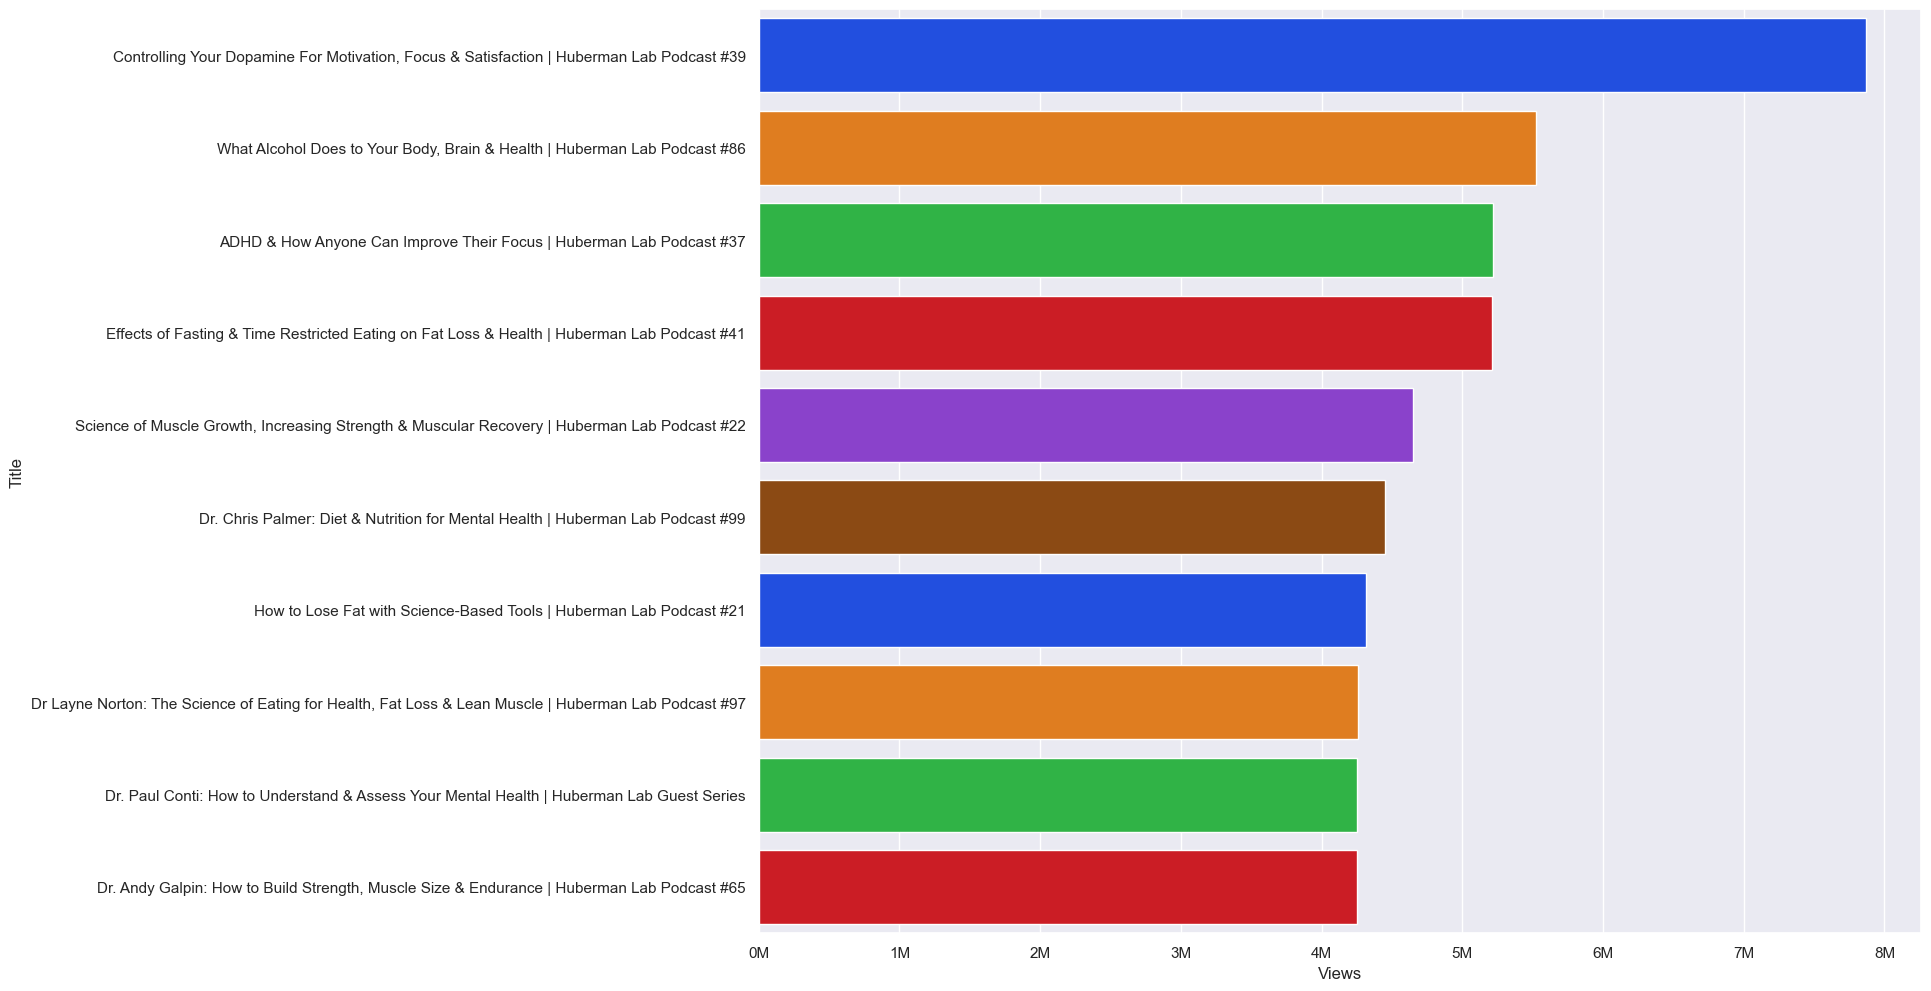

In [62]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos, palette = palette)
xlabels = ['{:,.0f}'.format(x) + 'M' for x in ax1.get_xticks()/1000000]
ax1.set_xticklabels(xlabels)

In [45]:
video_Data['Month']= pd.to_datetime(video_Data['Published_date']).dt.strftime('%b')

In [46]:
video_Data

,Title,Published_date,Views,Likes,Favorites,Comments,Month
0,"Dr. Natalie Crawford: Female Hormone Health, F...",2023-11-13,42010,1575,0,165,Nov
1,Dr. Michael Eisenberg: Improving Male Sexual H...,2023-11-06,209520,5160,0,649,Nov
2,AMA #12: Thoughts on Longevity Supplements (Re...,2023-10-31,120185,2441,0,250,Oct
3,Mental Health Toolkit: Tools to Bolster Your M...,2023-10-30,236796,6990,0,599,Oct
4,Mark Zuckerberg & Dr. Priscilla Chan: Curing A...,2023-10-23,342884,9507,0,3239,Oct
...,...,...,...,...,...,...,...
174,"How to Defeat Jetlag, Shift Work & Sleeplessne...",2021-01-25,437884,12144,0,1412,Jan
175,"Using Science to Optimize Sleep, Learning & Me...",2021-01-18,1220664,34831,0,1980,Jan
176,Master Your Sleep & Be More Alert When Awake |...,2021-01-11,3166128,93682,0,4852,Jan
177,How Your Nervous System Works & Changes | Hube...,2021-01-04,1213441,51585,0,2972,Jan


In [48]:
videos_per_month = video_Data.groupby('Month', as_index=False).size()
videos_per_month

,Month,size
0,Apr,14
1,Aug,17
2,Dec,11
3,Feb,17
4,Jan,17
5,Jul,14
6,Jun,13
7,Mar,15
8,May,16
9,Nov,13


In [49]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct','Nov','Dec']

In [50]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [54]:
videos_per_month = videos_per_month.sort_index()

C:\Users\acer\anaconda3\envs\YT-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\anaconda3\envs\YT-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\anaconda3\envs\YT-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


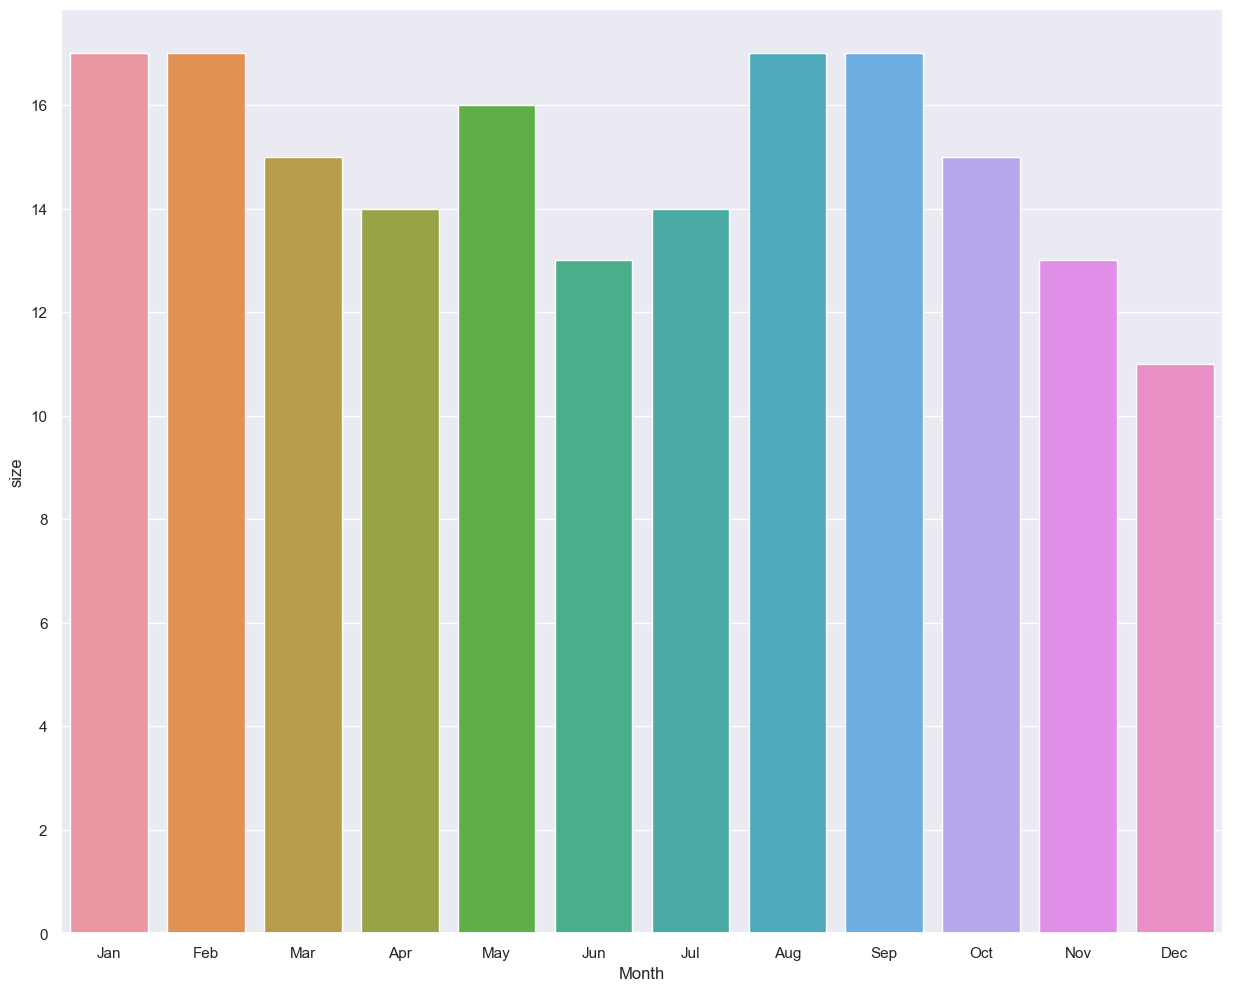

In [64]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

In [57]:
video_Data.to_csv("Video_Details(Andrew Kuberman).csv")